# Chapter 2 Problems - R

In [1]:
#### Sytem may require the following: 
# sudo apt install libcurl4-openssl-dev
# sudo apt install libxml2-dev

#### Only need to run the folloing installs once
# install.packages(c("ggplot2", "ggpubr", "tidyverse", "broom", "AICcmodavg"))

## Load Libraries

In [2]:
suppressMessages(library(readxl))
suppressMessages(library(ggplot2))
suppressMessages(library(ggpubr))
suppressMessages(library(tidyverse))
suppressMessages(library(broom))
suppressMessages(library(AICcmodavg))

### Functions

## 2.1

In [3]:
dataTableB1 <- read_excel('../linear_regression_5e_data_sets/Appendices/data-table-B1.XLS')

df <- data.frame(y=dataTableB1$y, x=dataTableB1$x8)

head(df)

,y,x
,<dbl>,<dbl>
1,10,2205
2,11,2096
3,11,1847
4,13,1903
5,10,1457
6,11,1848


In [4]:
summary(df)

       y                x       
 Min.   : 0.000   Min.   :1457  
 1st Qu.: 4.000   1st Qu.:1848  
 Median : 6.500   Median :2050  
 Mean   : 6.964   Mean   :2110  
 3rd Qu.:10.000   3rd Qu.:2320  
 Max.   :13.000   Max.   :2876  

In [5]:
cor(df$x, df$y)

[1] -0.7380273

### a

In [6]:
Football.lm <- lm(y ~ x, data=df)  # build linear regression model on full data
print(Football.lm)


Call:
lm(formula = y ~ x, data = df)

Coefficients:
(Intercept)            x  
  21.788251    -0.007025  



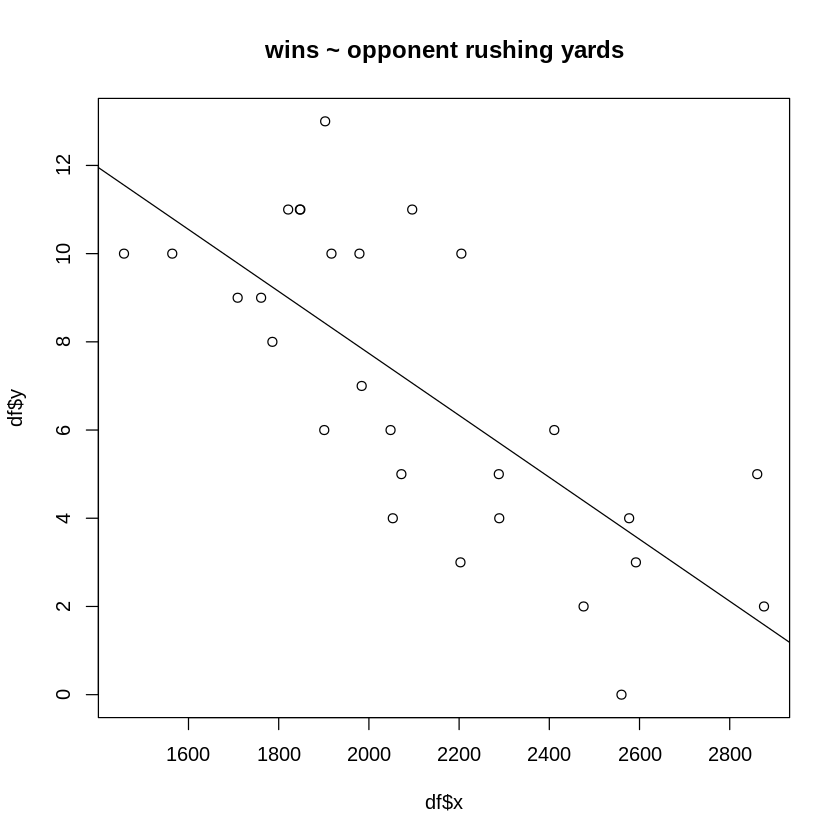

In [7]:
plot(x=df$x, y=df$y, main="wins ~ opponent rushing yards")
abline(Football.lm)

In [8]:
summary(Football.lm)


Call:
lm(formula = y ~ x, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-3.804 -1.591 -0.647  2.032  4.580 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 21.788251   2.696233   8.081 1.46e-08 ***
x           -0.007025   0.001260  -5.577 7.38e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.393 on 26 degrees of freedom
Multiple R-squared:  0.5447,	Adjusted R-squared:  0.5272 
F-statistic:  31.1 on 1 and 26 DF,  p-value: 7.381e-06


### b

In [9]:
anova(Football.lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,178.0923,178.092314,31.10324,7.380709e-06
Residuals,26,148.8720,5.725845,NA,NA


### c

In [10]:
 confint(Football.lm, level=0.95)

,2.5 %,97.5 %
(Intercept),16.246064040,27.330437725
x,-0.009614347,-0.004435854


### d

In [11]:
summary(Football.lm)$r.squared

[1] 0.5446843

### e

In [12]:
pred<-predict(Football.lm, data.frame(x = c(2000)), interval="confidence", level=0.95)
print(pred)

      fit      lwr      upr
1 7.73805 6.765753 8.710348


### Plot of Point Prediction Interval and Mean Confidence Interval

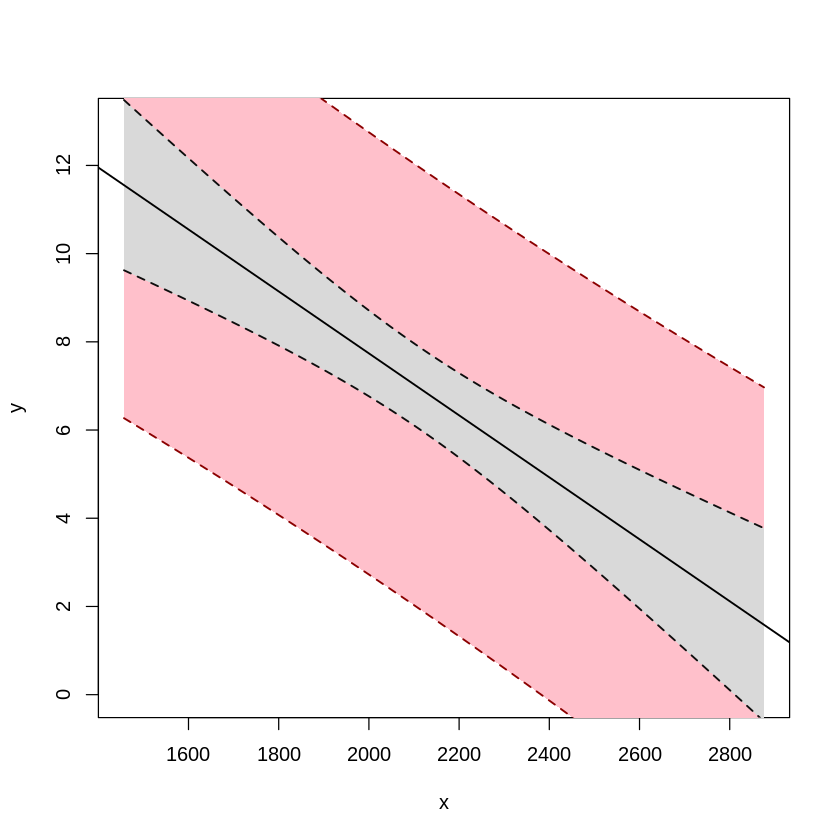

In [13]:
#get predicted y values using regression equation
newx <- seq(min(df$x), max(df$x), length.out=100)

#calculate the confidence interval values
conf <- predict(Football.lm, newdata = data.frame(x=newx), interval = 'confidence', level=0.95)

#calculate the prediction interval values
pred <- predict(Football.lm, newdata = data.frame(x=newx), interval = 'predict', level=0.95)

#create plot of x vs. y, but don't display individual points (type='n') 
plot(y ~ x, data = df, type='n')

#add polygon: Confidence Interval Upper -> Prediction Interval Upper
polygon(c(rev(newx), newx), c(rev(conf[ ,3]), pred[ ,3]), col = 'pink', border = NA)

#add polygon: Predicted Values -> Confidence Interval Upper
polygon(c(rev(newx), newx), c(rev(conf[ ,3]), conf[ ,1]), col = 'gray85', border = NA)

#add polygon: Predicted Values -> Confidence Interval Lower
polygon(c(rev(newx), newx), c(rev(conf[ ,2]), pred[ ,2]), col = 'pink', border = NA)

#add polygon: Confidence Interval Lower -> Prediction Interval Lower
polygon(c(rev(newx), newx), c(rev(conf[ ,2]), conf[ ,1]), col = 'gray85', border = NA)

#add line: Regression
abline(Football.lm, lwd=1.5)

#add line: Confidence Interval Upper
lines(newx, conf[ ,3], lty = 'dashed', col = 'gray5', lwd=1.5)
#add line: Confidence Interval Lower
lines(newx, conf[ ,2], lty = 'dashed', col = 'gray5', lwd=1.5)

#add line: Prediction Interval Upper
lines(newx, pred[ ,3], lty = 'dashed', col = 'red4', lwd=1.5)
#add line: Prediction Interval Upper
lines(newx, pred[ ,2], lty = 'dashed', col = 'red4', lwd=1.5)



In [ ]:
plot_bands(Ozone.df, Ozone.lm)

## 2.2

In [14]:
# Point Estimate
pred<-predict(Football.lm, data.frame(x = c(1800)), interval="predict", level=0.90)
print(pred)

      fit      lwr      upr
1 9.14307 4.936392 13.34975


## 2.3

In [15]:
dt <- read_excel('../linear_regression_5e_data_sets/Appendices/data-table-B2.XLS')

df <- data.frame(y=dt$y, x=dt$x4)

head(df)

,y,x
,<dbl>,<dbl>
1,271.8,16.66
2,264.0,16.46
3,238.8,17.66
4,230.7,17.50
5,251.6,16.40
6,257.9,16.28


### a

In [16]:
Solar.lm <- lm(y ~ x, data=df)
print(Solar.lm)


Call:
lm(formula = y ~ x, data = df)

Coefficients:
(Intercept)            x  
      607.1        -21.4  



### b

In [17]:
anova(Solar.lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,10578.685,10578.685,69.60944,5.935009e-09
Residuals,27,4103.244,151.972,NA,NA


### c

In [18]:
confint(Solar.lm, level=0.99)

,0.5 %,99.5 %
(Intercept),488.22411,725.98242
x,-28.50995,-14.29497


### d

In [19]:
summary(Solar.lm)$r.squared

[1] 0.7205242

### e

In [20]:
pred<-predict(Solar.lm, data.frame(x = c(16.5)), interval="confidence", level=0.95)
print(pred)

       fit      lwr      upr
1 253.9627 249.1468 258.7787


## 2.4

In [21]:
dt <- read_excel('../linear_regression_5e_data_sets/Appendices/data-table-B3.xlsx')

df <- data.frame(y=dt$y, x=dt$x1)

head(df)

,y,x
,<dbl>,<dbl>
1,18.90,350
2,17.00,350
3,20.00,250
4,18.25,351
5,20.07,225
6,11.20,440


### a

In [22]:
Mileage.lm <- lm(y ~ x, data=df)
print(Mileage.lm)


Call:
lm(formula = y ~ x, data = df)

Coefficients:
(Intercept)            x  
   33.72268     -0.04736  



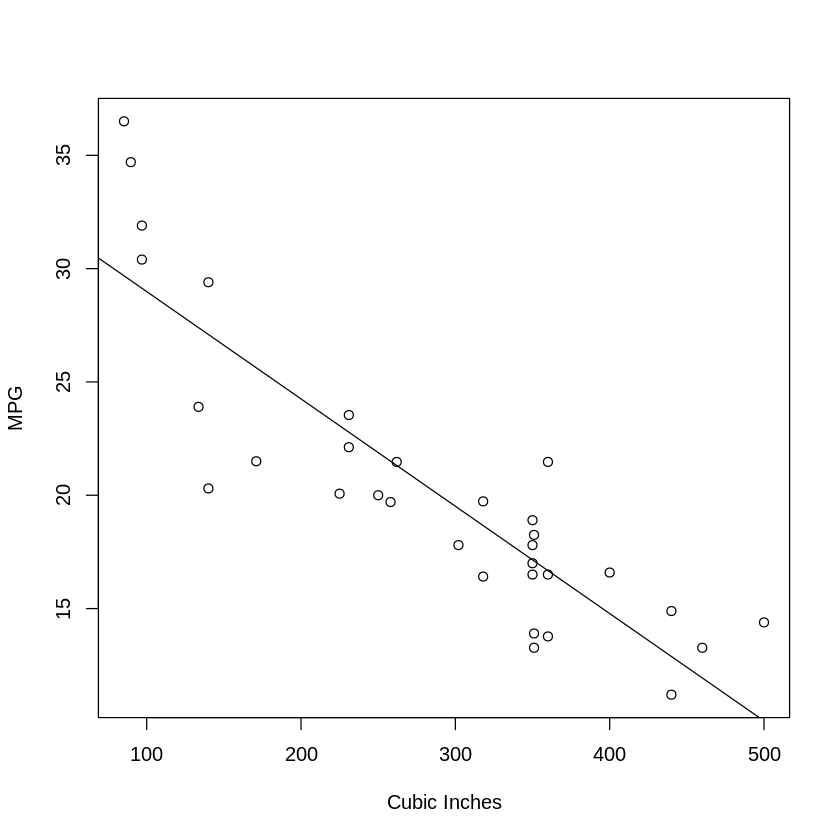

In [23]:
plot(x=df$x, y=df$y, xlab="Cubic Inches", ylab="MPG")
abline(Mileage.lm)

### b

In [24]:
anova(Mileage.lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,955.7197,955.719710,101.7357,3.743041e-11
Residuals,30,281.8244,9.394146,NA,NA


### c

In [25]:
summary(Mileage.lm)$r.squared

[1] 0.7722712

### d

In [26]:
pred<-predict(Mileage.lm, data.frame(x = c(275)), interval="confidence", level=0.95)
print(pred)

       fit      lwr      upr
1 20.69879 19.58807 21.80952


### e

In [27]:
pred<-predict(Mileage.lm, data.frame(x = c(275)), interval="predict", level=0.95)
print(pred)

       fit      lwr      upr
1 20.69879 14.34147 27.05611


### f

Of the two intervals the one for the point estimate is wider. For an individual point it can have
more variability.

## 2.5

### a

In [28]:
df <- data.frame(y=dt$y, x=dt$x10)

head(df)

,y,x
,<dbl>,<dbl>
1,18.90,3910
2,17.00,3860
3,20.00,3510
4,18.25,3890
5,20.07,3365
6,11.20,4215


In [29]:
Mileage.lm_2 <- lm(y ~ x, data=df)
print(Mileage.lm_2)


Call:
lm(formula = y ~ x, data = df)

Coefficients:
(Intercept)            x  
  40.852431    -0.005752  



In [30]:
summary(Mileage.lm_2)


Call:
lm(formula = y ~ x, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4093 -2.0352 -0.6714  3.0807  7.2026 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 40.8524315  2.2789916  17.926  < 2e-16 ***
x           -0.0057516  0.0006149  -9.353 2.12e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.246 on 30 degrees of freedom
Multiple R-squared:  0.7446,	Adjusted R-squared:  0.7361 
F-statistic: 87.48 on 1 and 30 DF,  p-value: 2.121e-10


### b

In [31]:
anova(Mileage.lm_2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,921.5279,921.52790,87.48235,2.120672e-10
Residuals,30,316.0162,10.53387,NA,NA


### c

In [32]:
summary(Mileage.lm_2)$r.squared

[1] 0.7446425

I would conclude that the first model, that which determines the relationship between cubic inches vs Mileage

## 2.6

In [33]:
dt <- read_excel('../linear_regression_5e_data_sets/Appendices/data-table-B4.XLS')

df <- data.frame(y=dt$y, x=dt$x1)

head(df)

,y,x
,<dbl>,<dbl>
1,29.5,5.0208
2,27.9,4.5429
3,25.9,4.5573
4,29.9,5.0597
5,29.9,3.8910
6,30.9,5.8980


### a

In [34]:
House.lm <- lm(y ~ x, data=df)
print(House.lm)


Call:
lm(formula = y ~ x, data = df)

Coefficients:
(Intercept)            x  
     13.320        3.324  



### b

In [35]:
summary(House.lm)


Call:
lm(formula = y ~ x, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8343 -2.3157 -0.3669  1.9787  6.3168 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  13.3202     2.5717   5.179 3.42e-05 ***
x             3.3244     0.3903   8.518 2.05e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.961 on 22 degrees of freedom
Multiple R-squared:  0.7673,	Adjusted R-squared:  0.7568 
F-statistic: 72.56 on 1 and 22 DF,  p-value: 2.051e-08


In [36]:
anova(House.lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,636.1557,636.155685,72.5563,2.051257e-08
Residuals,22,192.8906,8.767753,NA,NA


### c

In [37]:
summary(House.lm)$r.squared

[1] 0.7673344

### d

In [38]:
confint(House.lm, level=0.95)

,2.5 %,97.5 %
(Intercept),7.986755,18.653604
x,2.514988,4.133754


### e

In [39]:
pred <- predict(House.lm, data.frame(x = c(.75)), interval="confidence", level=0.95)
print(pred)

       fit      lwr      upr
1 15.81346 11.06792 20.55899


## 2.7

In [48]:
hydro_vec <- c(1.02,1.11,1.43,1.11,1.01,0.95,1.11,0.87,1.43,1.02,
               1.46,1.55,1.55,1.55,1.4,1.15,1.01,0.99,0.95,0.98)
purity_vec <- c(86.91,89.85,90.28,86.34,92.58,87.33,86.29,91.86,
                95.61,89.86,96.73,99.42,98.66,96.07,93.65,87.31,95,96.85,85.2,90.56)
Oxygen.df <- data.frame(hydro=hydro_vec, purity=purity_vec)
head(Oxygen.df)

,hydro,purity
,<dbl>,<dbl>
1,1.02,86.91
2,1.11,89.85
3,1.43,90.28
4,1.11,86.34
5,1.01,92.58
6,0.95,87.33


### a

In [49]:
Oxygen.lm <- lm(purity ~ hydro, data=Oxygen.df)
print(Oxygen.lm)


Call:
lm(formula = purity ~ hydro, data = Oxygen.df)

Coefficients:
(Intercept)        hydro  
      77.86        11.80  



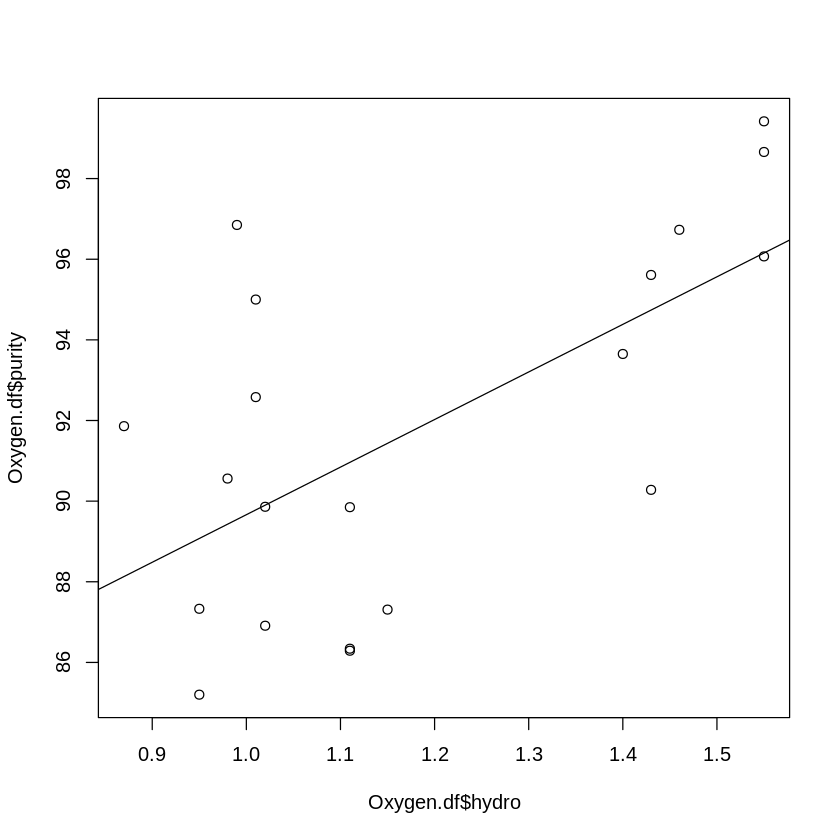

In [50]:
plot(x=Oxygen.df$hydro, y=Oxygen.df$purity)
abline(Oxygen.lm)

### b

In [51]:
summary(Oxygen.lm)


Call:
lm(formula = purity ~ hydro, data = Oxygen.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6724 -3.2113 -0.0626  2.5783  7.3037 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   77.863      4.199  18.544 3.54e-13 ***
hydro         11.801      3.485   3.386  0.00329 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.597 on 18 degrees of freedom
Multiple R-squared:  0.3891,	Adjusted R-squared:  0.3552 
F-statistic: 11.47 on 1 and 18 DF,  p-value: 0.003291


### c

In [52]:
summary(Oxygen.lm)$r.squared

[1] 0.3891224

### d

In [53]:
confint(Oxygen.lm)

,2.5 %,97.5 %
(Intercept),69.041747,86.68482
hydro,4.479066,19.12299


### e

In [54]:
predict(Oxygen.lm, data.frame(hydro=c(1.00)), interval="confidence", level=0.95)

,fit,lwr,upr
1,89.66431,87.51017,91.81845


## 2.8

### a

In [57]:
cor(Oxygen.df$hydro, Oxygen.df$purity)

[1] 0.6237968

### b

In [58]:
cor.test(Oxygen.df$hydro, Oxygen.df$purity)


	Pearson's product-moment correlation

data:  Oxygen.df$hydro and Oxygen.df$purity
t = 3.3861, df = 18, p-value = 0.003291
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2503961 0.8356439
sample estimates:
      cor 
0.6237968 


### c

In [82]:
# To calculate confidence interval for p to 95%
Oxygen.cor <- cor(Oxygen.df$hydro, Oxygen.df$purity)
print(Oxygen.cor)

[1] 0.6237968


In [83]:
alpha <- 0.95
Z <- qnorm(1-(1 - alpha)/2)
print(Z)

[1] 1.959964


In [84]:
n <- nrow(Oxygen.df)
print(n)

[1] 20


In [88]:
tanh(atanh(.624) + (Z / sqrt(n - 3)))

[1] 0.8357442

In [89]:
tanh(atanh(.624) - (Z / sqrt(n - 3)))

[1] 0.2507079

## 2.9

In [91]:
SoftDrink.DataTable <- read_excel('../linear_regression_5e_data_sets/Chapter 2/Examples/data-ex-2-9 (Delivery Time).xls')

SoftDrink.df <- data.frame(
    y=SoftDrink.DataTable$'Delivery Time, y', 
    x=SoftDrink.DataTable$'Number of Cases, x')

head(SoftDrink.df)

,y,x
,<dbl>,<dbl>
1,16.68,7
2,11.50,3
3,12.03,3
4,14.88,4
5,13.75,6
6,18.11,7


In [97]:
SoftDrink.lmNoIntercept <- lm(y ~ 0 + x, data=SoftDrink.df)
summary(SoftDrink.lmNoIntercept)
anova(SoftDrink.lmNoIntercept)


Call:
lm(formula = y ~ 0 + x, data = SoftDrink.df)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.4497  -0.2195   1.7025   4.2573   9.4289 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
x  2.41422    0.08297    29.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.586 on 24 degrees of freedom
Multiple R-squared:  0.9724,	Adjusted R-squared:  0.9713 
F-statistic: 846.7 on 1 and 24 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,17805.9297,17805.92969,846.7266,3.139513e-20
Residuals,24,504.6993,21.02914,NA,NA


In [98]:
SoftDrink.lm <- lm(y ~ x, data=SoftDrink.df)
summary(SoftDrink.lm)
anova(SoftDrink.lm)


Call:
lm(formula = y ~ x, data = SoftDrink.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5811 -1.8739 -0.3493  2.1807 10.6342 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.321      1.371   2.422   0.0237 *  
x              2.176      0.124  17.546 8.22e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.181 on 23 degrees of freedom
Multiple R-squared:  0.9305,	Adjusted R-squared:  0.9275 
F-statistic: 307.8 on 1 and 23 DF,  p-value: 8.22e-15


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,5382.4088,5382.40880,307.8463,8.220192e-15
Residuals,23,402.1338,17.48408,NA,NA


In [103]:
SoftDrink.lm.rsquared <- summary(SoftDrink.lm)$r.squared
SoftDrink.lmNoIntercept.rsquared <- summary(SoftDrink.lmNoIntercept)$r.squared

In [106]:
SoftDrink.lm.anova <- anova(SoftDrink.lm)
SoftDrink.lmNoIntercept.anova <- anova(SoftDrink.lmNoIntercept)
SoftDrink.lm.MSres <- SoftDrink.lm.anova['Residuals','Mean Sq']
SoftDrink.lmNoIntercept.MSres <- SoftDrink.lmNoIntercept.anova['Residuals','Mean Sq']

In [105]:
sprintf("R^2 for %s is: %f", "Intercept Model", SoftDrink.lm.rsquared)
sprintf("R^2 for %s is: %f", "No-Intercept Model", SoftDrink.lmNoIntercept.rsquared)

[1] "R^2 for Intercept Model is: 0.930481"

[1] "R^2 for No-Intercept Model is: 0.972437"

In [108]:
sprintf("Mean Squared Residual for %s is: %f", "Intercept Model", SoftDrink.lm.MSres)
sprintf("Mean Squared Residual for %s is: %f", "No-Intercept Model", SoftDrink.lmNoIntercept.MSres)

[1] "Mean Squared Residual for Intercept Model is: 17.484078"

[1] "Mean Squared Residual for No-Intercept Model is: 21.029138"

In [109]:
# The Mean Squared Residual for the Intercept model is less and therefore the preferred model

## 2.10

### a

In [170]:
BloodPressure.DataTable <- read_excel('../linear_regression_5e_data_sets/Chapter 2/Problems/data-prob-2-10.XLS')

BloodPressure.df <- data.frame(
    x=BloodPressure.DataTable$'weight', 
    y=BloodPressure.DataTable$'sys bp')

head(BloodPressure.df)

,x,y
,<dbl>,<dbl>
1,165,130
2,167,133
3,180,150
4,155,128
5,212,151
6,175,146


In [195]:
BloodPressure.lm <- lm(y ~ x, data=BloodPressure.df)
BloodPressure.lm.summary <- summary(BloodPressure.lm)
BloodPressure.lm.anova <- anova(BloodPressure.lm)
BloodPressure.lm.MSres <- BloodPressure.lm.anova['Residuals','Mean Sq']
BloodPressure.lm.rsquared <- BloodPressure.lm.summary$r.squared

In [172]:
BloodPressure.lm.summary


Call:
lm(formula = y ~ x, data = BloodPressure.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.182  -6.485  -2.519   8.926  12.143 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 69.10437   12.91013   5.353 1.71e-05 ***
x            0.41942    0.07015   5.979 3.59e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.681 on 24 degrees of freedom
Multiple R-squared:  0.5983,	Adjusted R-squared:  0.5815 
F-statistic: 35.74 on 1 and 24 DF,  p-value: 3.591e-06


In [173]:
BloodPressure.lm.anova

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,2693.581,2693.58122,35.74418,3.591105e-06
Residuals,24,1808.573,75.35719,NA,NA


### b

In [174]:
BloodPressure.cor <- cor(x = BloodPressure.df$x, y = BloodPressure.df$y)
print(BloodPressure.cor)

[1] 0.7734903


### c

In [175]:
cor.test(BloodPressure.df$x, BloodPressure.df$y)


	Pearson's product-moment correlation

data:  BloodPressure.df$x and BloodPressure.df$y
t = 5.9786, df = 24, p-value = 3.591e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5513214 0.8932215
sample estimates:
      cor 
0.7734903 


In [176]:
# Manually calculating t_0
BloodPressure.t_0_manual <- (sqrt(BloodPressure.lm.rsquared) * 
                             sqrt(nrow(BloodPressure.df) - 2)) / sqrt(1 - BloodPressure.lm.rsquared)
# Extract the t_0 value from the correlation test
BloodPressure.t_0 <- unname(cor.test(BloodPressure.df$x, BloodPressure.df$y)$statistic)
# Show equivalency
identical(BloodPressure.t_0_manual, BloodPressure.t_0)

[1] FALSE

In [186]:
t_alpha <- qt(.975, df=nrow(BloodPressure.df))

Testing for $\rho=0$ 

In [187]:
BloodPressure.lm.RejectNull <- (abs(t_0) > t_alpha)
print(BloodPressure.lm.RejectNull)

[1] TRUE


### d

In [191]:
rho_0 <- 0.6
Z_0 <- (atanh(sqrt(BloodPressure.lm.rsquared)) - atanh(rho_0)) * (nrow(BloodPressure.df) - 3)^(1/2)
print(Z_0)

[1] 1.610495


In [189]:
alpha <- 0.95
Z_alpha <- qnorm(1-(1 - alpha)/2)
print(Z_alpha)

[1] 1.959964


Testing for $\rho=0.6$ 

In [190]:
BloodPressure.lm.RejectNull_2 <- (abs(Z_0) > Z_alpha)
print(BloodPressure.lm.RejectNull_2)

[1] FALSE


### e

In [182]:
alpha <- 0.95
Z <- qnorm(1-(1 - alpha)/2)

In [183]:
tanh(atanh(BloodPressure.cor) - (Z / sqrt(nrow(BloodPressure.df) - 3)))

[1] 0.5513214

In [184]:
tanh(atanh(BloodPressure.cor) + (Z / sqrt(nrow(BloodPressure.df) - 3)))

[1] 0.8932215

In [185]:
cor.test(BloodPressure.df$x, BloodPressure.df$y)$conf.int

[1] 0.5513214 0.8932215
attr(,"conf.level")
[1] 0.95

## 2.11

In [196]:
BloodPressure.lmNoIntercept <- lm(y ~ 0 + x, data=BloodPressure.df)
BloodPressure.lmNoIntercept.summary <- summary(BloodPressure.lmNoIntercept)
BloodPressure.lmNoIntercept.anova <- anova(BloodPressure.lmNoIntercept)
BloodPressure.lmNoIntercept.MSres <- BloodPressure.lmNoIntercept.anova['Residuals','Mean Sq']
BloodPressure.lmNoIntercept.rsquared <- BloodPressure.lmNoIntercept.summary$r.squared

In [197]:
sprintf("R^2 for %s is: %f", "Intercept Model", BloodPressure.lm.rsquared)
sprintf("R^2 for %s is: %f", "No-Intercept Model", BloodPressure.lmNoIntercept.rsquared)

[1] "R^2 for Intercept Model is: 0.598287"

[1] "R^2 for No-Intercept Model is: 0.992861"

In [198]:
sprintf("Mean Squared Residual for %s is: %f", "Intercept Model", BloodPressure.lm.MSres)
sprintf("Mean Squared Residual for %s is: %f", "No-Intercept Model", BloodPressure.lmNoIntercept.MSres)

[1] "Mean Squared Residual for Intercept Model is: 75.357193"

[1] "Mean Squared Residual for No-Intercept Model is: 158.707269"

In [199]:
BloodPressure.lmNoIntercept.summary


Call:
lm(formula = y ~ 0 + x, data = BloodPressure.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.245  -0.902   6.170  10.254  16.838 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
x  0.79164    0.01343   58.97   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.6 on 25 degrees of freedom
Multiple R-squared:  0.9929,	Adjusted R-squared:  0.9926 
F-statistic:  3477 on 1 and 25 DF,  p-value: < 2.2e-16


## 2.12

### a

In [204]:
Steam.DataTable <- read_excel('../linear_regression_5e_data_sets/Chapter 2/Problems/data-prob-2-12.XLS')

Steam.df <- data.frame(
    x=Steam.DataTable$'temp', 
    y=Steam.DataTable$'usage')

head(Steam.df)

,x,y
,<dbl>,<dbl>
1,21,185.79
2,24,214.47
3,32,288.03
4,47,424.84
5,50,454.68
6,59,539.03


In [205]:
Steam.lm <- lm(y ~ x, data=Steam.df)
Steam.lm.summary <- summary(Steam.lm)
Steam.lm.anova <- anova(Steam.lm)
Steam.lm.MSres <- Steam.lm.anova['Residuals','Mean Sq']
Steam.lm.rsquared <- Steam.lm.summary$r.squared

In [206]:
Steam.lm


Call:
lm(formula = y ~ x, data = Steam.df)

Coefficients:
(Intercept)            x  
     -6.332        9.208  


In [224]:
Steam.lm.anova

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,280589.5653,280589.56527,74122.78,1.099192e-20
Residuals,10,37.8547,3.78547,NA,NA


### b

In [239]:
Steam.t_0 <- Steam.lm.summary$coefficients['x','t value']
Steam.t_alpha <- qt(.975, df=nrow(Steam.df))
Steam.t_RejectNull <- (abs(Steam.t_0) > Steam.t_alpha)
print(Steam.t_RejectNull)

[1] TRUE


In [241]:
Steam.F_value <- Steam.lm.anova['x','F value']
print(Steam.F_value)

[1] 74122.78


### c

Yes, the estimate in close.

The slope of the linear model is 9.2 (* 1000). So this would mean for an average increase in temparature of 1 degree,
to have an increase in steam usage by nearly 10,000 pounds.

### d

In [221]:
predict(Steam.lm, data.frame(x=c(58)), interval="predict", level=0.99)

,fit,lwr,upr
1,527.759,521.2237,534.2944


## 2.13


### a

In [242]:
Ozone.DataTable <- read_excel('../linear_regression_5e_data_sets/Chapter 2/Problems/data-prob-2-13.XLS')

Ozone.df <- data.frame(
    x=Ozone.DataTable$'index', 
    y=Ozone.DataTable$'days')

head(Ozone.df)

,x,y
,<dbl>,<dbl>
1,16.7,91
2,17.1,105
3,18.2,10
4,18.1,10
5,17.2,8
6,18.2,91


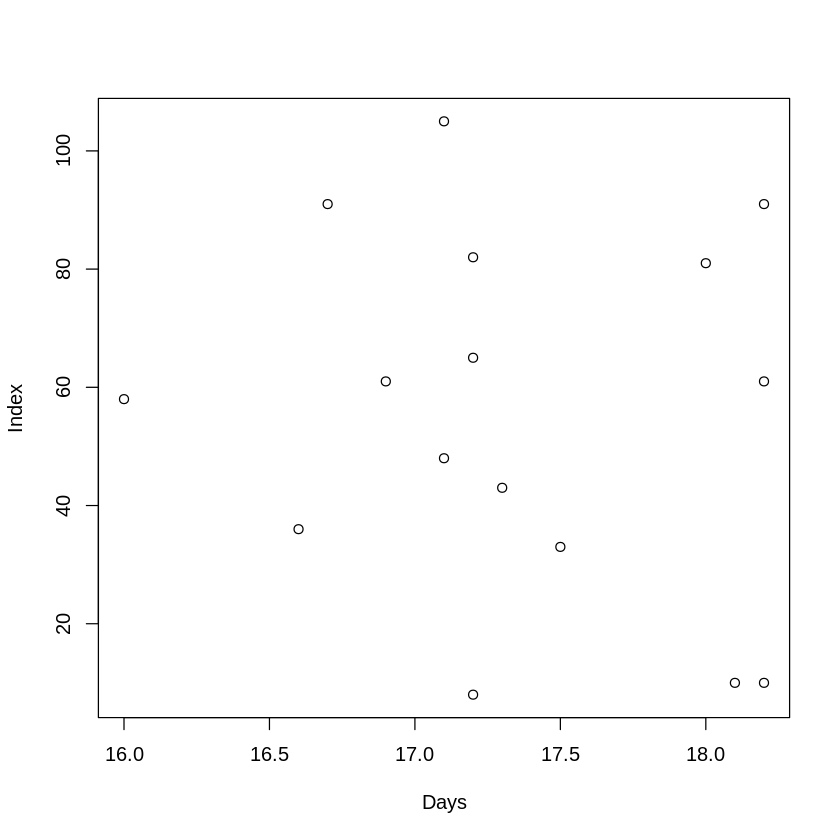

In [245]:
plot(x=Ozone.df$x, y=Ozone.df$y,xlab="Days",ylab="Index")

### b

In [251]:
Ozone.lm <- lm(y ~ x, data=Ozone.df)
Ozone.lm.summary <- summary(Ozone.lm)
Ozone.lm.anova <- anova(Ozone.lm)
Ozone.lm.MSres <- Ozone.lm.anova['Residuals','Mean Sq']
Ozone.lm.rsquared <- Ozone.lm.summary$r.squared
print(Ozone.lm.summary$coefficients)

              Estimate Std. Error    t value  Pr(>|t|)
(Intercept) 183.596159  214.35905  0.8564890 0.4061492
x            -7.403743   12.35126 -0.5994323 0.5584615


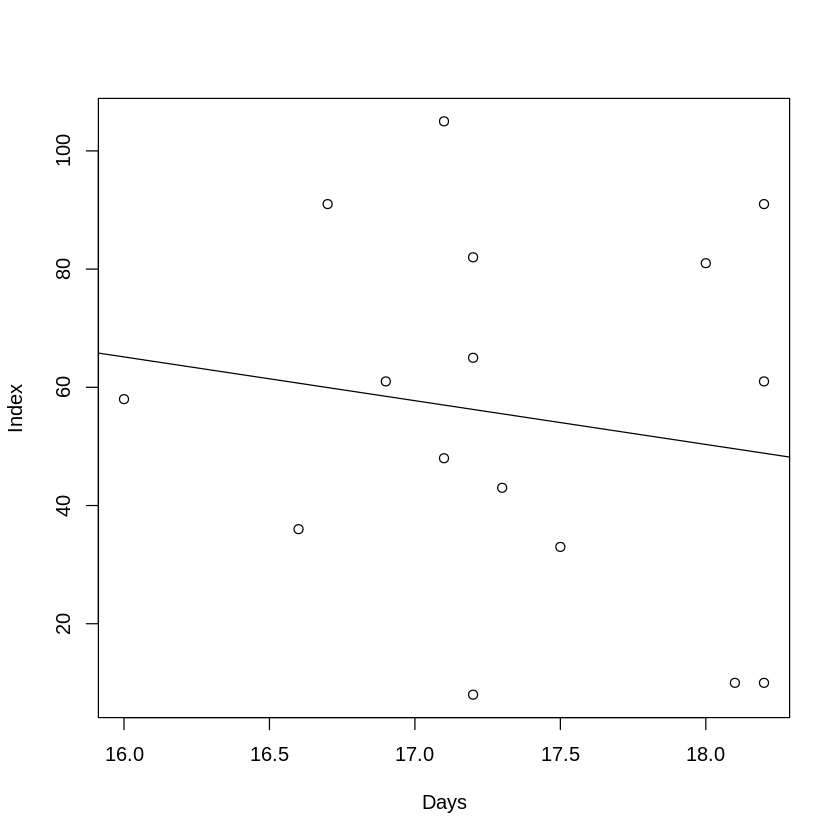

In [250]:
plot(x=Ozone.df$x, y=Ozone.df$y,xlab="Days",ylab="Index")
abline(Ozone.lm)

### c

In [252]:
Ozone.t_0 <- Ozone.lm.summary$coefficients['x','t value']
Ozone.t_alpha <- qt(.975, df=nrow(Ozone.df))
Ozone.t_RejectNull <- (abs(Ozone.t_0) > Ozone.t_alpha)
print(Ozone.t_RejectNull)

[1] FALSE


In [253]:
Ozone.F_value <- Ozone.lm.anova['x','F value']
print(Ozone.F_value)

[1] 0.3593191


### d

In [266]:
plot_bands <- function(DataFrame, LinearModel){
    #get predicted y values using regression equation
    newx <- seq(min(DataFrame$x), max(DataFrame$x), length.out=100)

    #calculate the confidence interval values
    conf <- predict(LinearModel, newdata = data.frame(x=newx), interval = 'confidence', level=0.95)

    #calculate the prediction interval values
    pred <- predict(LinearModel, newdata = data.frame(x=newx), interval = 'predict', level=0.95)

    #create plot of x vs. y, but don't display individual points (type='n') 
    ########### Add flexibility to this plot function..
    plot(y ~ x, data = DataFrame, type='n')
    #############

    #add polygon: Confidence Interval Upper -> Prediction Interval Upper
    polygon(c(rev(newx), newx), c(rev(conf[ ,3]), pred[ ,3]), col = 'pink', border = NA)

    #add polygon: Predicted Values -> Confidence Interval Upper
    polygon(c(rev(newx), newx), c(rev(conf[ ,3]), conf[ ,1]), col = 'gray85', border = NA)

    #add polygon: Predicted Values -> Confidence Interval Lower
    polygon(c(rev(newx), newx), c(rev(conf[ ,2]), pred[ ,2]), col = 'pink', border = NA)

    #add polygon: Confidence Interval Lower -> Prediction Interval Lower
    polygon(c(rev(newx), newx), c(rev(conf[ ,2]), conf[ ,1]), col = 'gray85', border = NA)

    #add line: Regression
    abline(LinearModel, lwd=1.5)

    #add line: Confidence Interval Upper
    lines(newx, conf[ ,3], lty = 'dashed', col = 'gray5', lwd=1.5)
    #add line: Confidence Interval Lower
    lines(newx, conf[ ,2], lty = 'dashed', col = 'gray5', lwd=1.5)

    #add line: Prediction Interval Upper
    lines(newx, pred[ ,3], lty = 'dashed', col = 'red4', lwd=1.5)
    #add line: Prediction Interval Upper
    lines(newx, pred[ ,2], lty = 'dashed', col = 'red4', lwd=1.5)
}

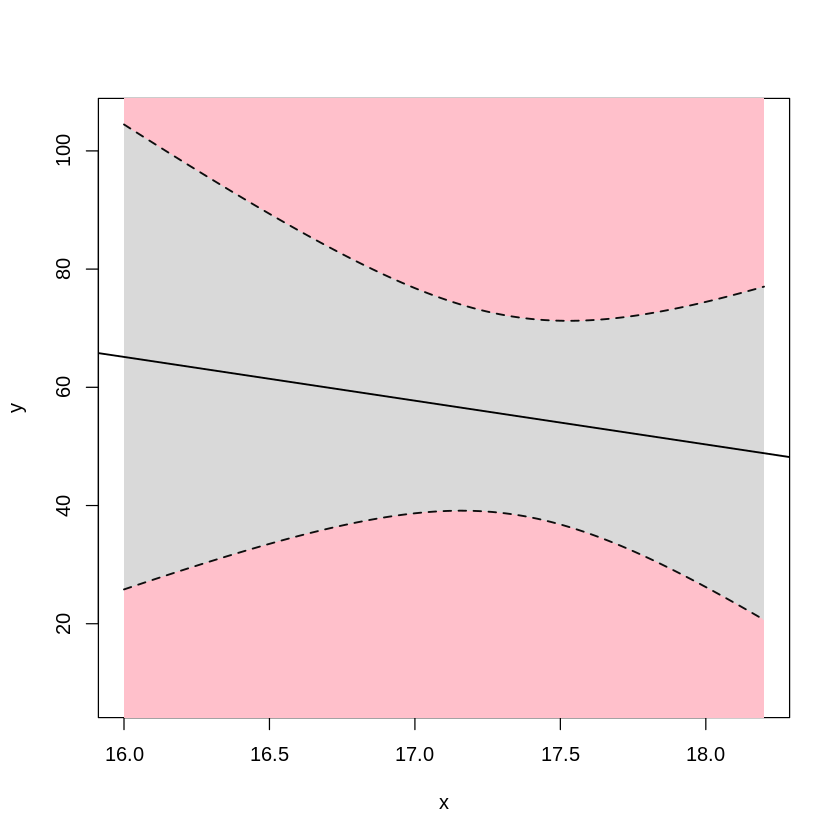

In [267]:
plot_bands(Ozone.df, Ozone.lm)

## 2.14

### a

### b

### c

### d

## 2.15

### a

### b

### c